In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_path = "/home/abraham/tenacademy/Gokada/data/raw"
nb_data = pd.read_csv(f"{df_path}/nb.csv")
driver_location_data = pd.read_csv(f"{df_path}/driver_locations_during_request.csv")


# sample exploration
print("some information about nb_data\n", nb_data.info())
print("some information on driver location data\n", driver_location_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
some information about nb_data
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  f

In [2]:


print("some top datas\n", nb_data.head(5))
print("some head datas on driver location data\n", driver_location_data.head(5))

some top datas
    Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37  
1  6.4280814653326,3.4721885847586  2021-07-01 06:38:04  2021-07-01 07:07:28  
2      6.508324099999999,3.3590397  2021-07-01 06:21:02  2021-07-01 07:02:23  
3      6.584881099999999,3.3614073  2021-07-01 07:16:07  2021-07-01 07:29:42  
4              6.4501069,3.3916154  2021-07-01 09:30:59  2021-07-01 09:34:36  
some head datas on driver location data
    id  order_id  driver_id driver_action       lat       lng  created_at  \
0   1    392001     243828      accepted  6.602207  3.270465         NaN   
1   2    392001 

In [3]:

from datetime import datetime
#changing data type of trip start time to datetime to make some statistical operations on data s 
nb_data['Trip Start Time'] = pd.to_datetime(nb_data['Trip Start Time'])
nb_data['Trip End Time'] = pd.to_datetime(nb_data['Trip End Time'])

nb_data['Trip Start Time']=nb_data['Trip Start Time'].fillna(nb_data['Trip Start Time'].mean())
nb_data['Trip End Time']=nb_data['Trip End Time'].fillna(nb_data['Trip End Time'].mean())

print("some description dtas on nb_data\n", nb_data.describe())

#dropping columns with no value
driver_location_data.drop(driver_location_data.columns[driver_location_data.isna().all(axis=0)], axis=1, inplace=True)
print("some description datas on driver location data\n", driver_location_data.describe())

some description dtas on nb_data
             Trip ID                Trip Start Time  \
count  5.360200e+05                         536020   
mean   9.910221e+05  2021-10-02 10:24:45.446032896   
min    3.919960e+05            2021-07-01 06:21:02   
25%    6.935610e+05  2021-08-18 15:01:36.249999872   
50%    9.910085e+05            2021-10-05 08:10:05   
75%    1.281570e+06     2021-11-16 17:00:34.500000   
max    1.637709e+06            2022-06-13 10:04:28   
std    3.456364e+05                            NaN   

                       Trip End Time  
count                         536020  
mean   2021-10-02 15:06:34.897927168  
min              2021-07-01 07:02:23  
25%    2021-08-18 15:36:09.249999872  
50%       2021-10-05 14:22:50.500000  
75%    2021-11-17 11:59:12.750000128  
max              2022-06-13 10:42:15  
std                              NaN  
some description datas on driver location data
                  id      order_id     driver_id           lat           lng
coun

In [4]:
# Check for missing values
print("Missing values in nb.csv:")
print(nb_data.isnull().sum())


print("\nMissing values in driver_locations_during_request.csv:")
print(driver_location_data.isnull().sum())

Missing values in nb.csv:
Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64

Missing values in driver_locations_during_request.csv:
id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64


In [5]:
# Explore data types
print("\nData types in nb.csv:")
print(nb_data.dtypes)

print("\nData types in driver_locations_during_request.csv:")
print(driver_location_data.dtypes)



Data types in nb.csv:
Trip ID                      int64
Trip Origin                 object
Trip Destination            object
Trip Start Time     datetime64[ns]
Trip End Time       datetime64[ns]
dtype: object

Data types in driver_locations_during_request.csv:
id                 int64
order_id           int64
driver_id          int64
driver_action     object
lat              float64
lng              float64
dtype: object


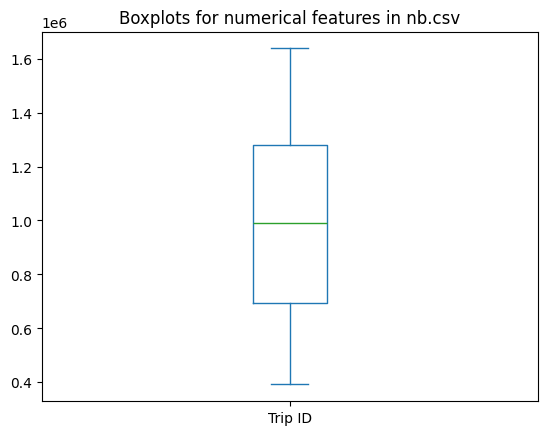

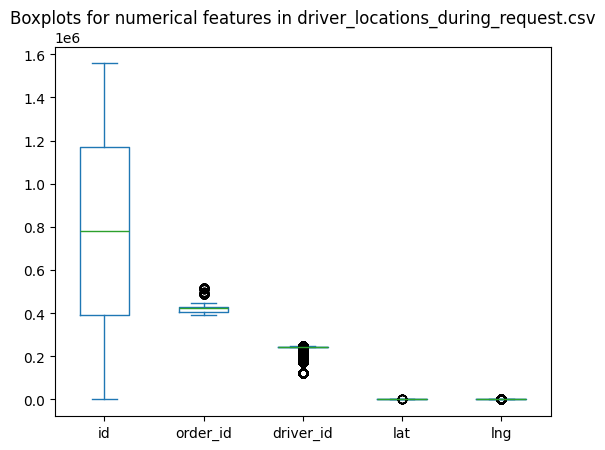

In [6]:
# Explore outliers with boxplots (numerical features)
numerical_features_nb = nb_data.select_dtypes(include=[np.number, datetime])  # Assuming numerical data
numerical_features_driver = driver_location_data.select_dtypes(include=[np.number])

if len(numerical_features_nb) > 0:
  numerical_features_nb.plot(kind='box')
  plt.title("Boxplots for numerical features in nb.csv")
  plt.show()

if len(numerical_features_driver) > 0:
  numerical_features_driver.plot(kind='box')
  plt.title("Boxplots for numerical features in driver_locations_during_request.csv")
  plt.show()

# (Optional) Create additional visualizations like histograms for further exploration

# nb_data['trip_start_timestamp'] = nb_data['Trip Start Time'].dt.timestamp()
# nb_data['trip_end_timestamp'] = nb_data['Trip End Time'].dt.timestamp()

# # Plot the timestamps
# nb_data[['trip_start_timestamp', 'trip_end_timestamp']].plot(kind='box')



0 days 04:41:49.451894514


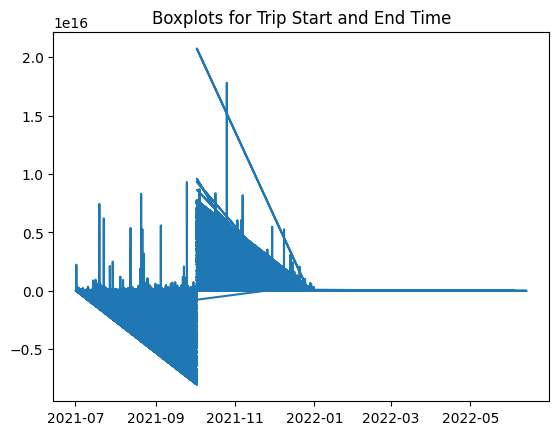

0   0 days 00:01:33
1   0 days 00:29:24
2   0 days 00:41:21
3   0 days 00:13:35
4   0 days 00:03:37
Name: trip_duration, dtype: timedelta64[ns]


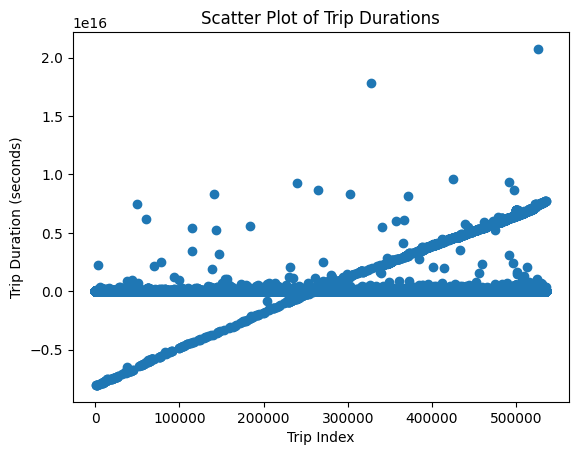

In [7]:

nb_data['trip_duration'] = nb_data['Trip End Time'] - nb_data['Trip Start Time']
print(nb_data['trip_duration'].mean())

# nb_data[['trip_start_timestamp', 'trip_end_timestamp']].plot(kind='box')

# nb_data[['Trip Start Time', 'trip_duration']].plot(kind='box')
plt.plot(nb_data['Trip Start Time'], nb_data['trip_duration'])
plt.title("Boxplots for Trip Start and End Time")
plt.show()

# Assuming 'nb_data' has a 'trip_duration' column with timedelta objects
nb_data['trip_duration_in_seconds'] = nb_data['trip_duration'].dt.total_seconds()  # Convert to seconds
print(nb_data['trip_duration'].head())


plt.scatter(nb_data.index, nb_data['trip_duration'])  # Or use another column on the x-axis if applicable

# Label the axes
plt.xlabel("Trip Index")  # Or adjust the label based on your x-axis data
plt.ylabel("Trip Duration (seconds)")

# Add a title
plt.title("Scatter Plot of Trip Durations")

# Show the plot
plt.show()

description of filteresd data
             Trip ID                Trip Start Time  \
count  5.357950e+05                         535795   
mean   9.911445e+05  2021-10-02 10:24:29.452279040   
min    3.919960e+05            2021-07-01 06:21:02   
25%    6.936730e+05            2021-08-18 14:51:01   
50%    9.912390e+05            2021-10-05 08:50:31   
75%    1.281791e+06            2021-11-16 17:13:18   
max    1.637709e+06            2022-06-13 10:04:28   
std    3.456305e+05                            NaN   

                       Trip End Time                trip_duration  \
count                         535795                       535795   
mean   2021-10-02 15:33:11.799511296    0 days 05:08:42.347230983   
min              2021-07-01 07:02:23              0 days 00:00:01   
25%              2021-08-18 15:45:04              0 days 00:33:45   
50%              2021-10-05 14:43:14              0 days 00:53:03   
75%       2021-11-17 12:14:00.500000              0 days 01:20:25   

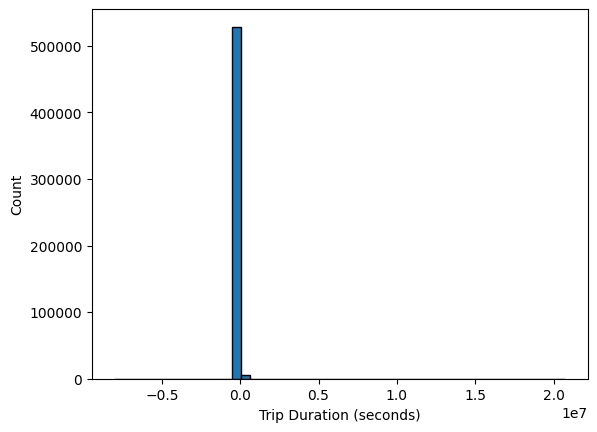

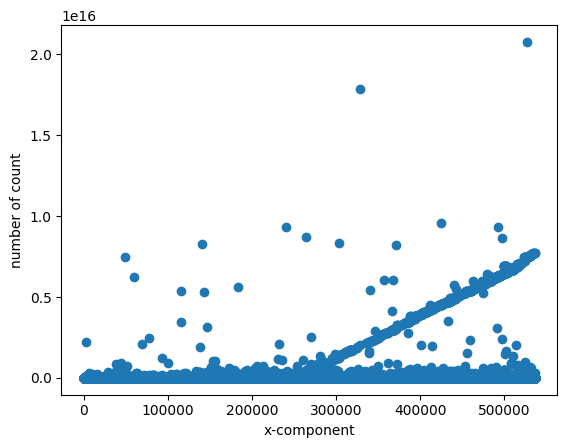

            Trip ID                Trip Start Time  \
count  1.475000e+03                           1475   
mean   1.377468e+06  2021-10-02 17:56:41.725443072   
min    3.973120e+05            2021-07-01 16:54:34   
25%    1.280365e+06  2021-10-02 10:24:45.446032896   
50%    1.414563e+06  2021-10-02 10:24:45.446032896   
75%    1.491086e+06  2021-10-02 10:24:45.446032896   
max    1.637091e+06            2021-12-24 18:14:39   
std    1.601738e+05                            NaN   

                       Trip End Time                trip_duration  \
count                           1475                         1475   
mean   2021-11-30 12:32:48.239930880   58 days 18:36:06.514487670   
min              2021-07-24 17:55:16             10 days 00:08:16   
25%       2021-11-17 12:48:45.500000   45 days 21:55:10.553967104   
50%              2021-12-04 07:19:24   62 days 20:52:57.553967104   
75%       2021-12-13 20:20:42.500000   72 days 08:11:11.553967104   
max              2022-05-30 14

In [8]:

filtered_data = nb_data[nb_data['Trip Start Time'] < nb_data['Trip End Time'] ]  # Select rows where trip_duration is not negative

# Save the filtered data to a new CSV file
filtered_data.to_csv("filtered_trip_data.csv", index=False)  # Adjust filename as needed
print("description of filteresd data\n", filtered_data.describe())

print(nb_data['trip_duration'].describe())
# Now use the new column for the histogram
plt.hist(nb_data['trip_duration_in_seconds'], bins=50, edgecolor='black')
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.show()



plt.scatter(filtered_data.index, filtered_data['trip_duration'])
plt.xlabel("x-component")
plt.ylabel("number of count")
plt.show()

threshold_days = np.timedelta64(10, 'D')

# # Convert threshold to seconds for comparison (assuming trip_duration is in seconds)
# threshold_seconds = threshold_days / np.timedelta64(1, 's')

# # Ensure trip_duration is numeric (if necessary)
# if not pd.api.types.is_numeric_dtype(nb_data['trip_duration']):
#     nb_data['trip_duration'] = pd.to_numeric(nb_data['trip_duration'], errors='coerce')  # Convert to numeric, handle errors

# Filter data for durations greater than the threshold
new_filtered_data = nb_data[nb_data['trip_duration'] > threshold_days]

# Print the descriptive statistics of the filtered data
print(new_filtered_data.describe())